In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 

In [55]:
# choose a binary classification problem
data = load_breast_cancer()

breast_cancer_df=pd.DataFrame(data.data)


In [56]:
print("Cancer data set dimensions : {}".format(breast_cancer_df.shape))

Cancer data set dimensions : (569, 30)


In [83]:
# develop predictors X and target y dataframes
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)

In [104]:
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [105]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

In [106]:
# split data into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)


In [107]:
#With feature selection

RFE uses one of the classification methods (random forest in our example), assign weights to each feature. Whose absolute weights are the smallest are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features is reached.

In [110]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each pixel 
clf_rf_2 = RandomForestClassifier(random_state=43)      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=16, step=1)
rfe = rfe.fit(X_train, y_train)

In [111]:
print('Chosen best 16 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 16 feature by rfe: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean concavity', 'mean concave points',
       'area error', 'worst radius', 'worst texture', 'worst perimeter',
       'worst area', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points'],
      dtype='object')


Recall is:  0.8809523809523809
Accuracy is:  0.956140350877193
F1 score is:  0.9367088607594937


<AxesSubplot:>

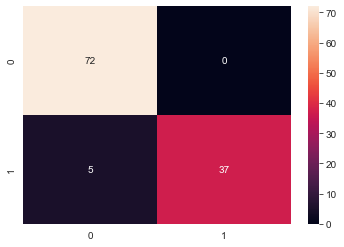

In [112]:

from sklearn.metrics import classification_report, confusion_matrix
recall = metrics.recall_score(y_test,rfe.predict(X_test))
print('Recall is: ', recall)
accuracy = metrics.accuracy_score(y_test,rfe.predict(X_test))
print('Accuracy is: ', accuracy)
f1 = metrics.f1_score(y_test,rfe.predict(X_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfe.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [101]:
#Without feature selection

In [102]:
# build a RF model with default parameters -without feature scaling 
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [103]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy 

0.956140350877193

In [94]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[72  0]
 [ 5 37]]


In [95]:
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)

recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
recall_sensitivity, recall_specificity 

(0.8809523809523809, 1.0)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



ROC can be plotted by calculating the true positive rate and false-positive rate. The values are calculated in steps by changing the threshold value from 0 to 1 gradually.

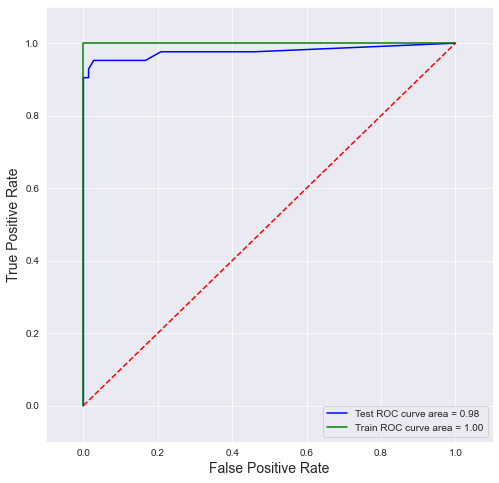

In [44]:
sns.set_style('darkgrid')
preds_train = model.predict(X_train)
# calculate prediction probability
prob_train = np.squeeze(model.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(model.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

Tuning ROC to find the optimum threshold value: Python guides find the right value of threshold (cut-off) with the following codes

In [47]:
# creating index
i = np.arange(len(tpr1))
# extracting roc values against different thresholds 
roc = pd.DataFrame({'fpr':fpr1, 'tpr':tpr1, 'tf':(tpr1-1+fpr1), 'thresholds':thresholds1}, index=i)
# top 5 best roc occurrences 
roc.iloc[(roc.tf-0).abs().argsort()[:5]] 

,fpr,tpr,tf,thresholds
16,0.027778,0.952381,-0.019841,0.28
17,0.083333,0.952381,0.035714,0.17
15,0.013889,0.928571,-0.057540,0.34
18,0.111111,0.952381,0.063492,0.16
14,0.013889,0.904762,-0.081349,0.41


Precision-Recall Curve

To find the best threshold value based on the trade-off between precision and recall, precision_recall_curve is drawn. 

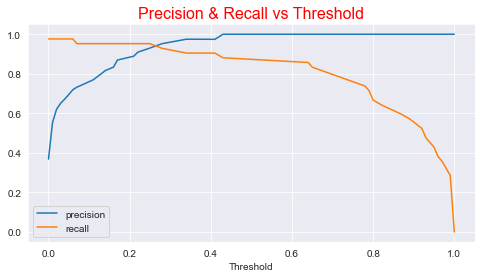

In [48]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show() 

Trade-off performed by our random forest model between Precision and Recall can be visualized using the following codes:

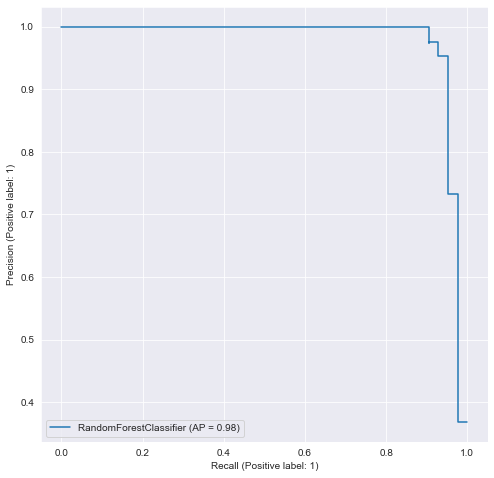

In [51]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(model, X_test, y_test, ax=ax) 

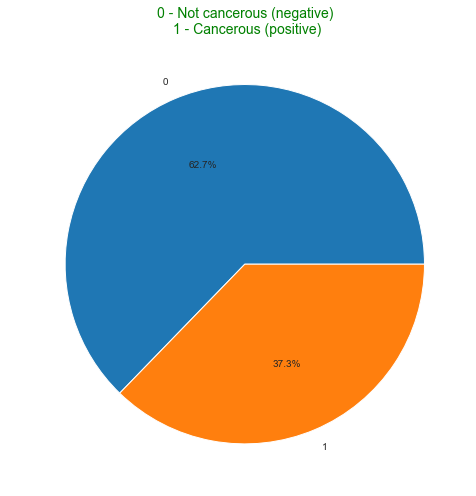

In [46]:
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)', size=14, c='green')
plt.tight_layout(); plt.show() 